In [1]:
pip install advertools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.5 MB/s eta 0:00:00


In [3]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
import networkx as nx
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)
adv.__version__

'0.16.1'

In [4]:
tweets_users_df = pd.read_csv('Tweets.csv', )
print(tweets_users_df.shape)
tweets_users_df.head(3)

(5089, 72)


tweet_contributors tweet_coordinates                tweet_created_at  \
0                 NaN               NaN  Fri Sep 07 16:25:06 +0000 2018   
1                 NaN               NaN  Fri Sep 07 16:24:59 +0000 2018   
2                 NaN               NaN  Fri Sep 07 16:24:50 +0000 2018   

  tweet_display_text_range  \
0                  [0, 75]   
1                 [0, 237]   
2                 [0, 176]   

                                                                                                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76...   
1  {'hashtags': [{'text': 'hero', 'indices': [90, 95]}, {'text': 'fdny', 'indices': [96, 101]}, {'text': 'likesforlikes', 'indices': [102, 116]}, {'text': 'promo', 'indices': [117, 123]}, {'text': 'music', 'indices': [124, 130]}, {'text': 'instagood', 'indices': [131, 141]}, {'t...   
2  {'hashtags': [{'text': 'JustDoIt', 'indices': [127, 136]}, {'text': '4YourMorning', 'indices': [137, 150]}, {'text': '4YourMemeCollection', 'indices': [151, 171]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100773396041728, 'id_str': '10381007733960...   

                                                                                                                                                                                                                                                                   tweet_extended_entities  \
0  {'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': '...   
1                                                                                                                                                                                                                                                                                      NaN   
2  {'media': [{'id': 1038100773396041728, 'id_str': '1038100773396041728', 'indices': [177, 200], 'media_url': 'http://pbs.twimg.com/media/DmgTJz9UUAA57tu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTJz9UUAA57tu.jpg', 'url': 'https://t.co/6ok9qR6k6M', 'display_url':...   

   tweet_favorite_count  tweet_favorited  \
0                     0            False   
1                     0            False   
2                     0            False   

                                                                                                                                                                                                                                     tweet_full_text  \
0                                                                                                                                                Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6   
1  Shout out to the Great Fire Department and the tour! 👨‍🚒👨‍🚒 Much love to NYC! 💯🎥🔥✊🏿\n•\n•\n•\n#hero #fdny #likesforlikes #promo #music #instagood #instadaily #postoftheday #bestoftheday #justdoit #nike #picoftheday... https://t.co/sFobQ2ukpo   
2                                       There are some AMAZINGLY hilarious Nike Ad memes happening on my newsfeed.  Soooo, I decided to get a little creative too... \n\n#JustDoIt #4YourMorning #4YourMemeCollection \n\n🍪😂 https://t.co/6ok9qR6k6M   

  tweet_geo             tweet_id         tweet_id_str  \
0       NaN  1038100857932394496  1038100857932394496   
1      

In [5]:
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [6]:
hashtag_summary = adv.extract_hashtags(tweets_users_df['tweet_full_text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [7]:
hashtag_summary['top_hashtags'][:10]

[('#justdoit', 5150),
 ('#nike', 1112),
 ('#colinkaepernick', 208),
 ('#takeaknee', 138),
 ('#kaepernick', 137),
 ('#nfl', 106),
 ('#nflkickoff', 75),
 ('#imwithkap', 73),
 ('#nikead', 70),
 ('#nikeboycott', 69)]

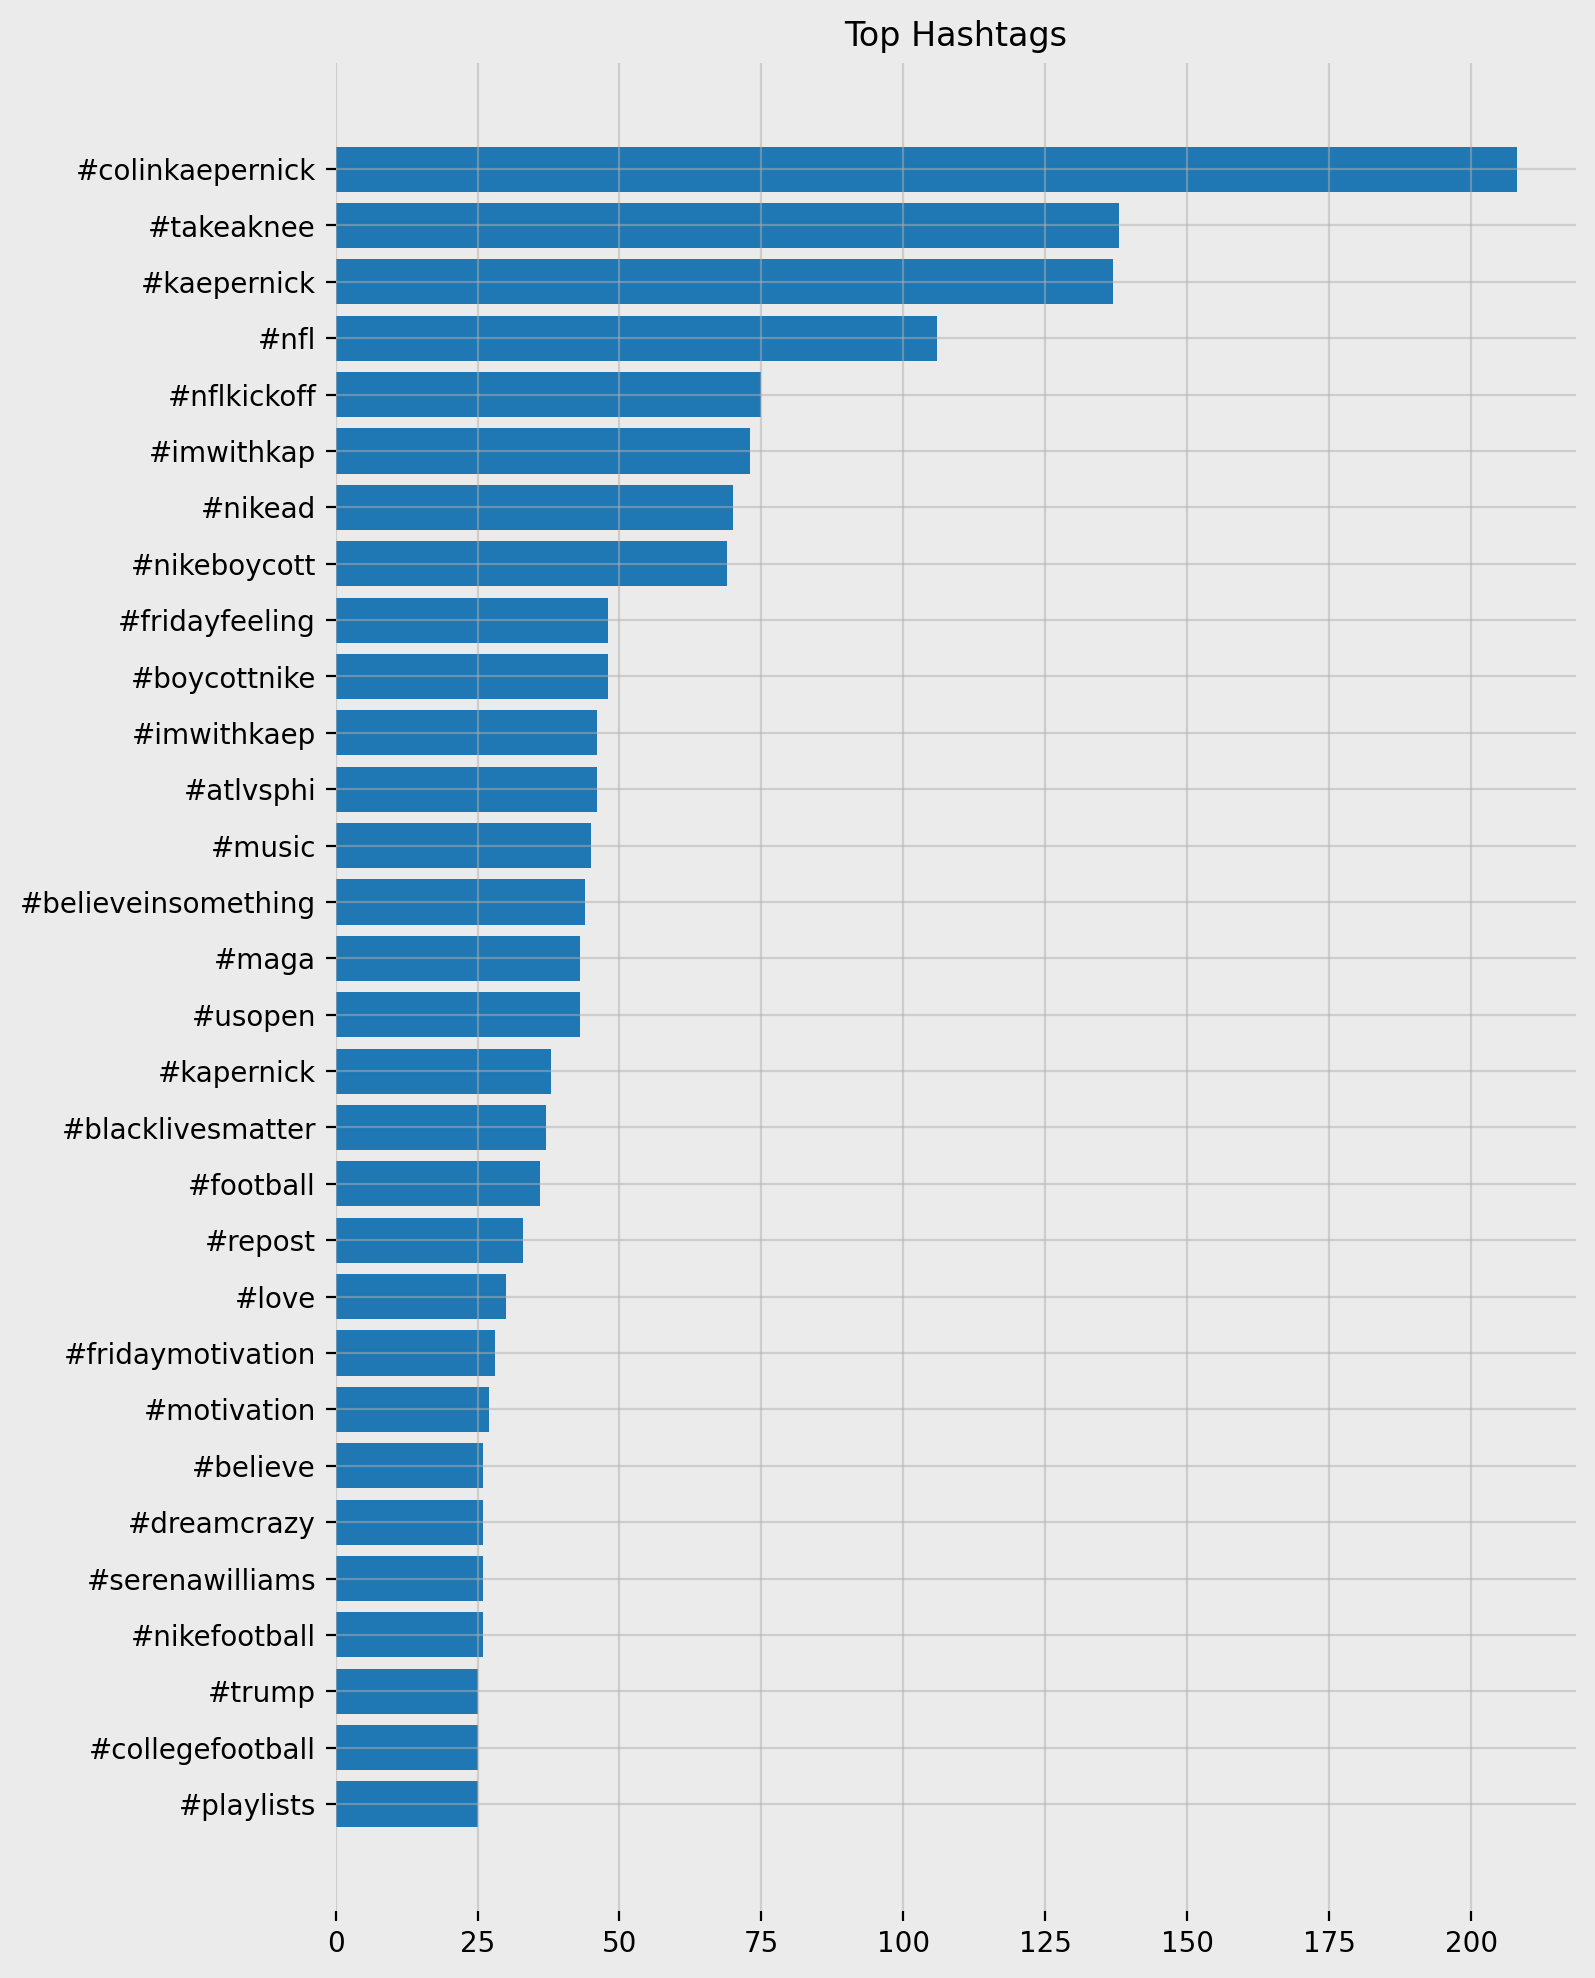

In [8]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)


In [9]:
mention_summary = adv.extract_mentions(tweets_users_df['tweet_full_text'])
mention_summary.keys()


dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [10]:
mention_summary['top_mentions'][:10]

[('@nike', 964),
 ('@kaepernick7', 493),
 ('@realdonaldtrump', 412),
 ('@serenawilliams', 84),
 ('@nfl', 65),
 ('@youtube', 38),
 ('@corybooker', 36),
 ('@potus', 29),
 ('@kingjames', 27),
 ('@nflcommish', 21)]

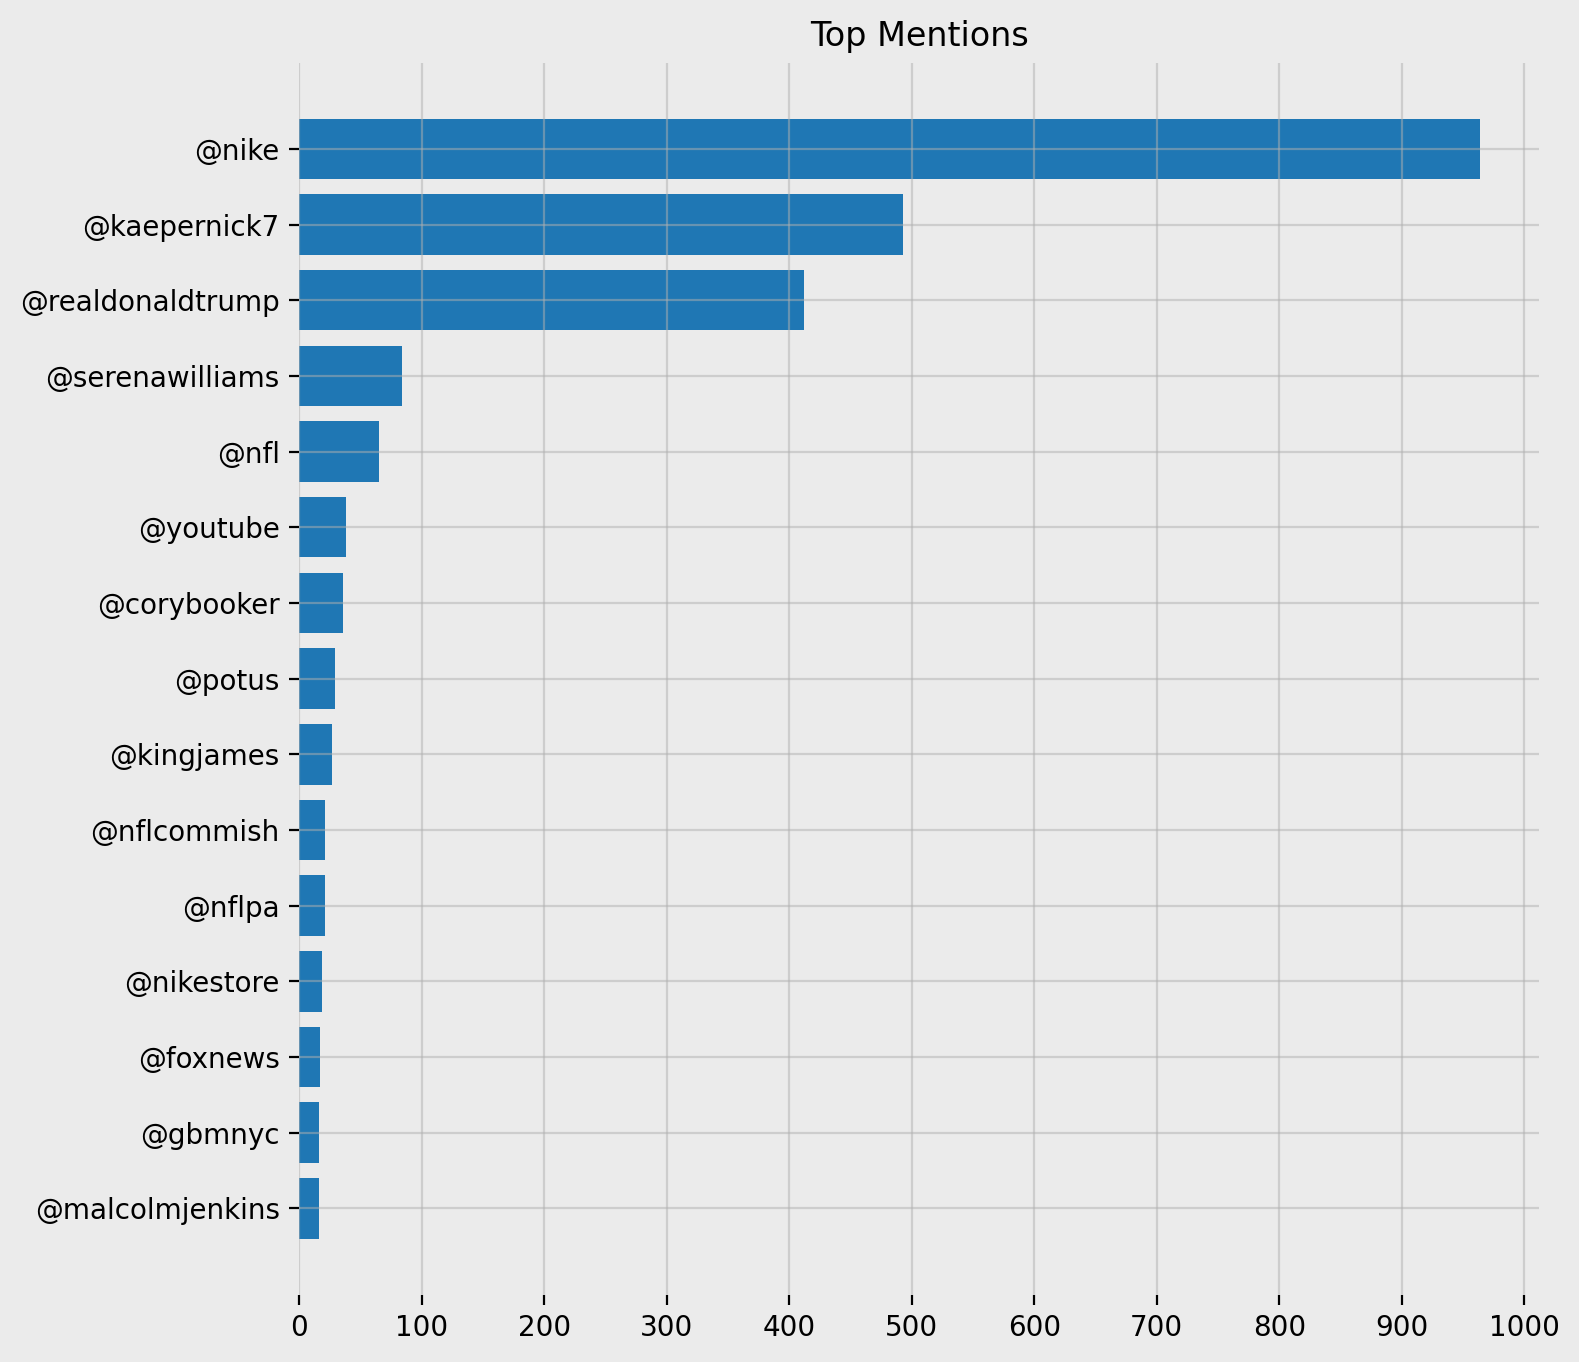

In [11]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [14]:
#pip install advertools networkx matplotlib pandas
# Create a network graph for hashtags
G_hashtags = nx.Graph()
G_mentions = nx.Graph()


In [15]:
pip install python-louvain

In [17]:
import community as community_louvain
tweets = tweets_users_df[['tweet_id', 'tweet_full_text', 'tweet_entities']]

In [18]:
# Function to extract hashtags and mentions from tweet entities
def extract_entities(entities_str):
    hashtags = []
    mentions = []
    try:
        entities = eval(entities_str)
        if 'hashtags' in entities:
            hashtags = [tag['text'] for tag in entities['hashtags']]
        if 'user_mentions' in entities:
            mentions = [mention['screen_name'] for mention in entities['user_mentions']]
    except:
        pass
    return hashtags, mentions

In [19]:
for index, row in tweets.iterrows():
    tweet_id = row['tweet_id']
    hashtags, mentions = extract_entities(row['tweet_entities'])

    for hashtag in hashtags:
        G_hashtags.add_node(tweet_id)
        G_hashtags.add_node(hashtag)
        G_hashtags.add_edge(tweet_id, hashtag)

    for mention in mentions:
        G_mentions.add_node(tweet_id)
        G_mentions.add_node(mention)
        G_mentions.add_edge(tweet_id, mention)

In [20]:
import pandas as pd
import networkx as nx
# Calculate centrality measures for hashtags network
hashtag_degree_centrality = nx.degree_centrality(G_hashtags)
hashtag_betweenness_centrality = nx.betweenness_centrality(G_hashtags)
hashtag_closeness_centrality = nx.closeness_centrality(G_hashtags)
hashtag_clustering_coefficient = nx.clustering(G_hashtags)


In [21]:
# Add these centrality measures as node attributes
for node in G_hashtags.nodes():
    G_hashtags.nodes[node]['degree_centrality'] = hashtag_degree_centrality[node]
    G_hashtags.nodes[node]['betweenness_centrality'] = hashtag_betweenness_centrality[node]
    G_hashtags.nodes[node]['closeness_centrality'] = hashtag_closeness_centrality[node]
    G_hashtags.nodes[node]['clustering_coefficient'] = hashtag_clustering_coefficient[node]

In [22]:
# Calculate centrality measures for mentions network
mention_degree_centrality = nx.degree_centrality(G_mentions)
mention_betweenness_centrality = nx.betweenness_centrality(G_mentions)
mention_closeness_centrality = nx.closeness_centrality(G_mentions)
mention_clustering_coefficient = nx.clustering(G_mentions)


In [23]:
# Add these centrality measures as node attributes
for node in G_mentions.nodes():
    G_mentions.nodes[node]['degree_centrality'] = mention_degree_centrality[node]
    G_mentions.nodes[node]['betweenness_centrality'] = mention_betweenness_centrality[node]
    G_mentions.nodes[node]['closeness_centrality'] = mention_closeness_centrality[node]
    G_mentions.nodes[node]['clustering_coefficient'] = mention_clustering_coefficient[node]

In [24]:
# Prepare node data for hashtags network
hashtags_nodes = pd.DataFrame([
    (node, attr['degree_centrality'], attr['betweenness_centrality'], attr['closeness_centrality'], attr['clustering_coefficient'])
    for node, attr in G_hashtags.nodes(data=True)
], columns=['Node', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Clustering Coefficient'])
hashtags_nodes.to_csv("hashtags_nodes.csv", index=False)

In [25]:
# Prepare node data for mentions network
mentions_nodes = pd.DataFrame([
    (node, attr['degree_centrality'], attr['betweenness_centrality'], attr['closeness_centrality'], attr['clustering_coefficient'])
    for node, attr in G_mentions.nodes(data=True)
], columns=['Node', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Clustering Coefficient'])
mentions_nodes.to_csv("mentions_nodes.csv", index=False)

In [27]:
from google.colab import files

# Downloading the files
files.download('hashtags_nodes.csv')
files.download('mentions_nodes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import csv
# Define a function to write edges to CSV
def write_edges_to_csv(edges, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        # Write header
        writer.writerow(["Source", "Target", "Weight"])
        # Write edge data
        for source, target, data in edges:
            writer.writerow([source, target, data.get('weight', 1)])


In [29]:
# Write hashtag edges to CSV
write_edges_to_csv(G_hashtags.edges(data=True), 'hashtag_edges.csv')

# Write mention edges to CSV
write_edges_to_csv(G_mentions.edges(data=True), 'mention_edges.csv')


In [30]:
from google.colab import files
files.download('hashtag_edges.csv')
files.download('mention_edges.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
!pip install keybert networkx TextNet
!pip install keybert networkx nltk

ERROR: Could not find a version that satisfies the requirement TextNet (from versions: none)
ERROR: No matching distribution found for TextNet
  Using cached keybert-0.8.5-py3-none-any.whl.metadata (15 kB)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython

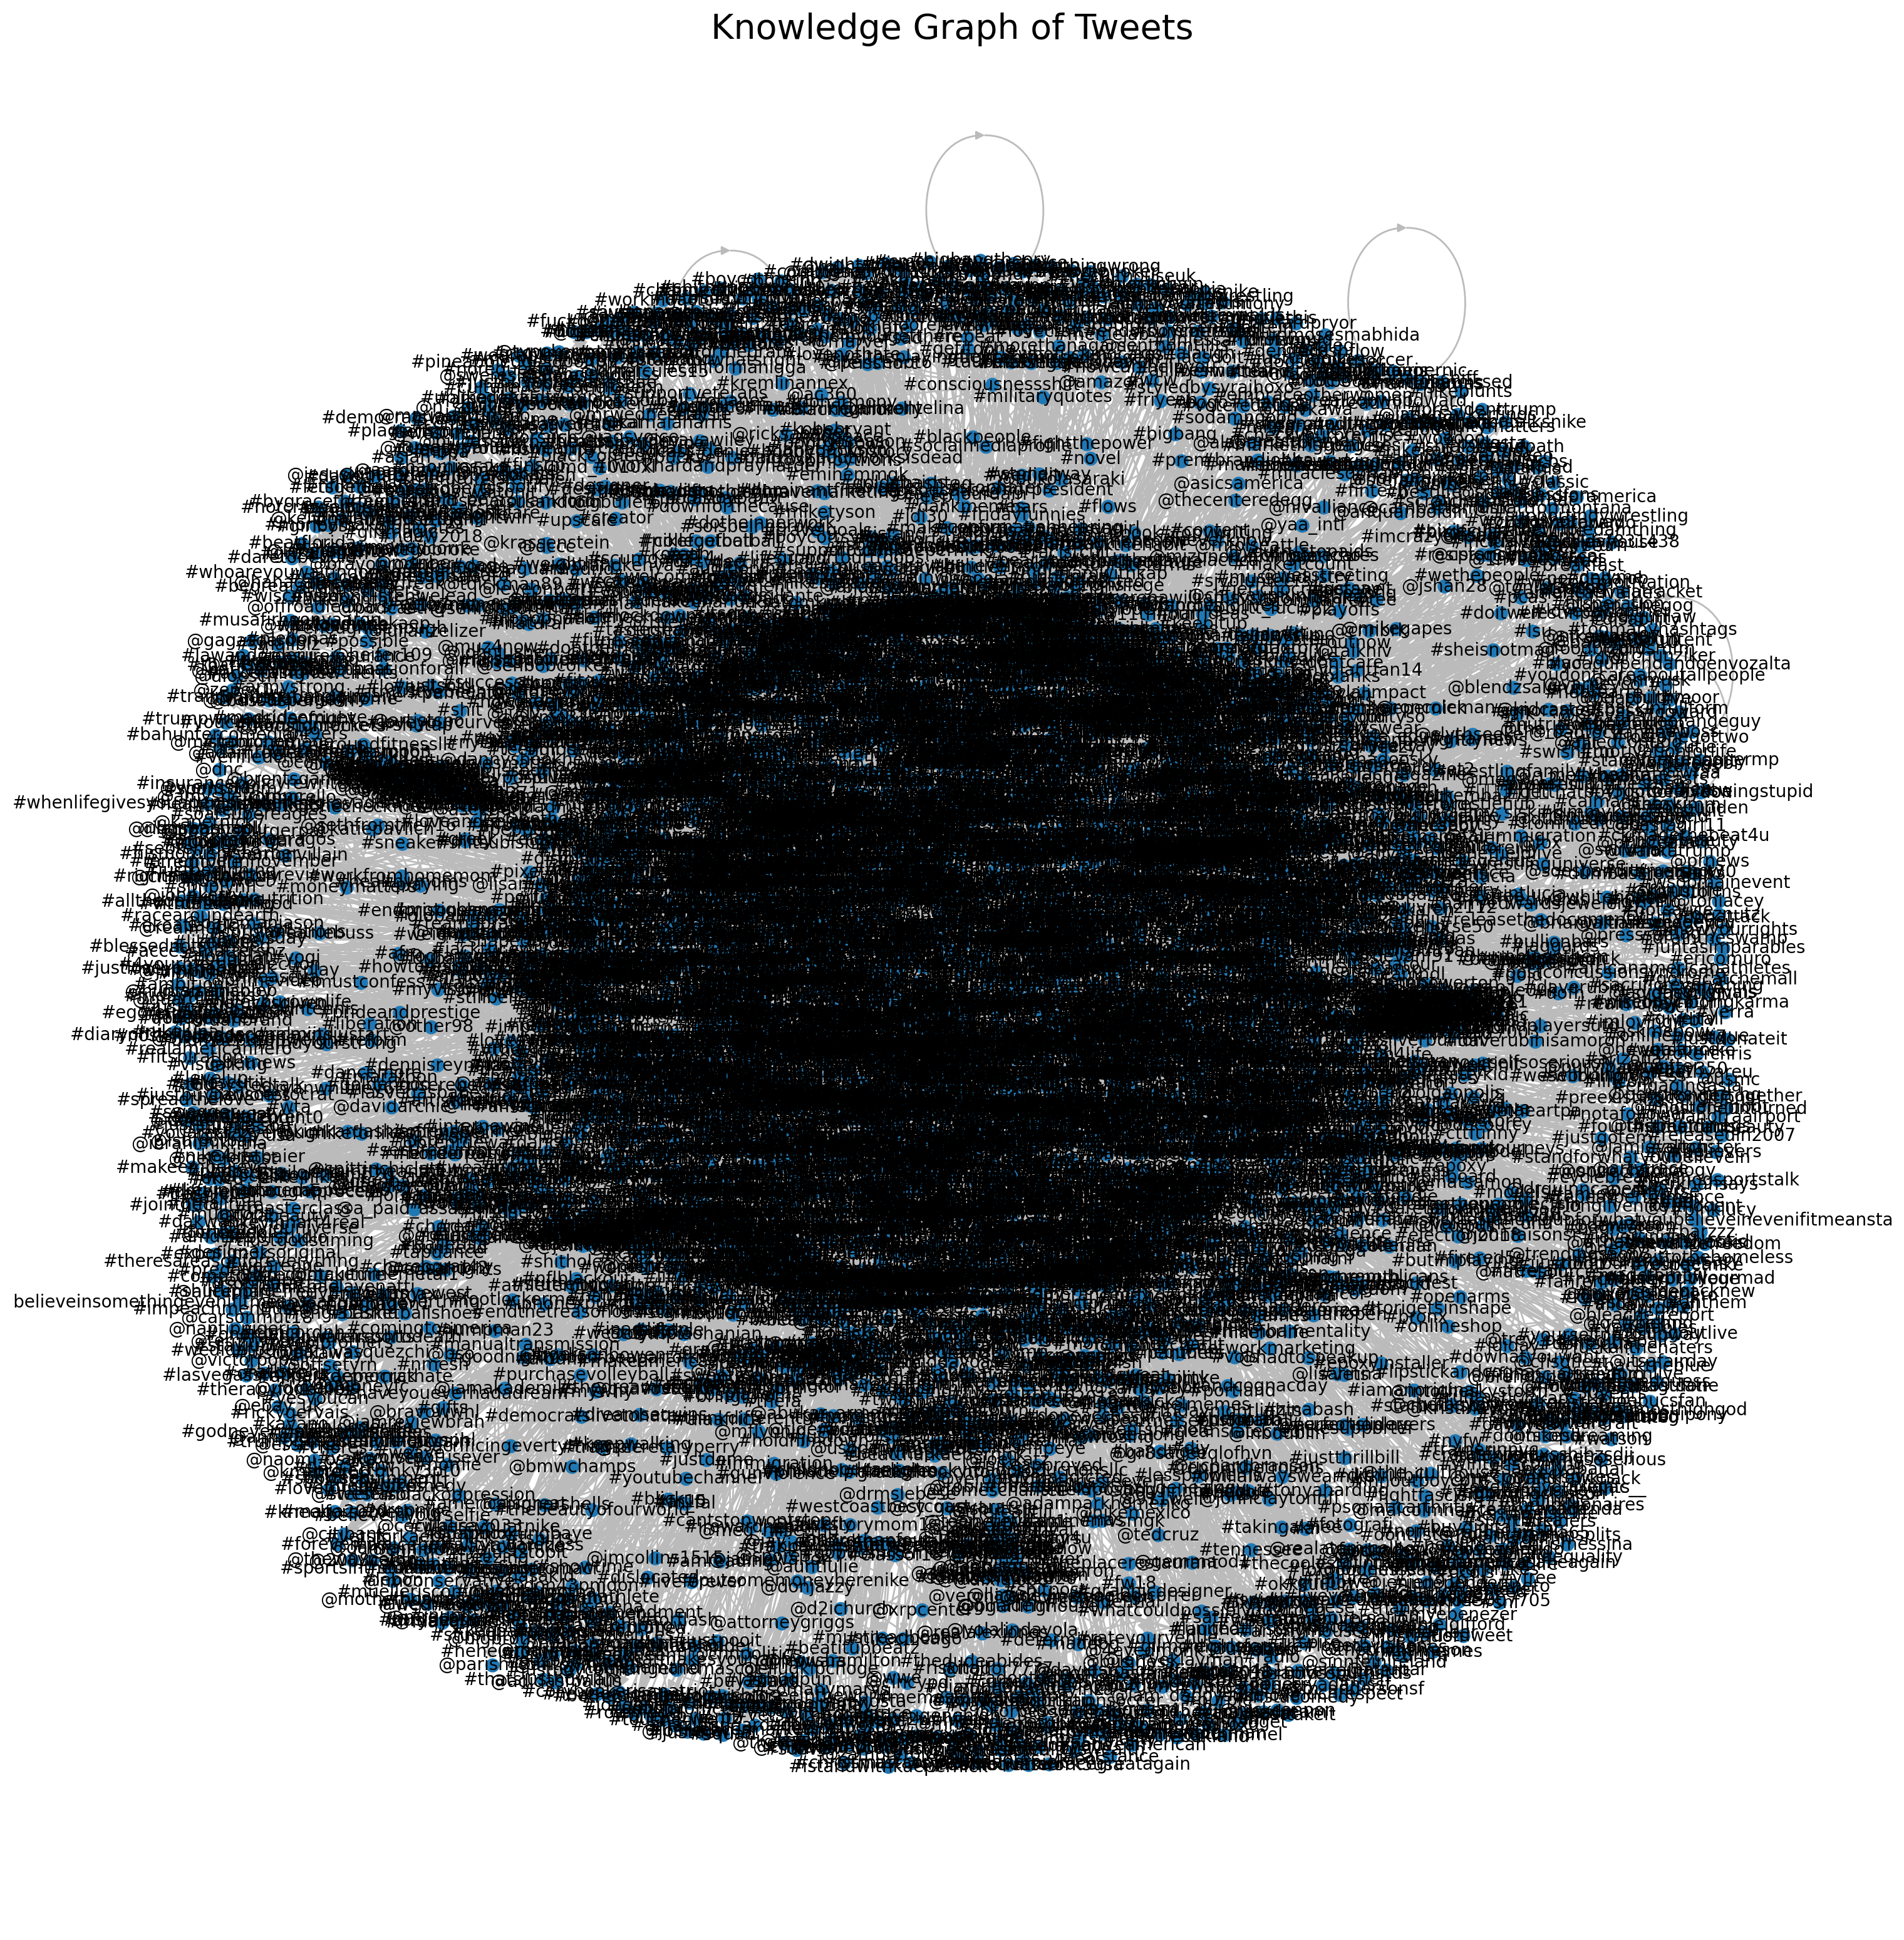

In [33]:
G = nx.DiGraph()
for hashtags in hashtag_summary['hashtags']:
    for i in range(len(hashtags)):
        for j in range(i + 1, len(hashtags)):
            if G.has_edge(hashtags[i], hashtags[j]):
                G[hashtags[i]][hashtags[j]]['weight'] += 1
            else:
                G.add_edge(hashtags[i], hashtags[j], weight=1)

for mentions in mention_summary['mentions']:
    for i in range(len(mentions)):
        for j in range(i + 1, len(mentions)):
            if G.has_edge(mentions[i], mentions[j]):
                G[mentions[i]][mentions[j]]['weight'] += 1
            else:
                G.add_edge(mentions[i], mentions[j], weight=1)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10, edge_color='#BBBBBB')
plt.title('Knowledge Graph of Tweets', fontsize=20)
plt.show()